In [1]:
import pandas as pd

match_ds = pd.read_csv('Match.csv')
match_c = match_ds.columns
match_df = match_ds.loc[:,[match_c[0],match_c[1],match_c[2],match_c[3],match_c[-2]]]
match_df["Match_Date"] = match_df["Match_Date"].str[:4]
match_df = match_df.dropna()
# print(match_df["Match_Date"] ==  "2016")
test_df = match_df[match_df["Match_Date"] ==  "2016"]
match_df = match_df[match_df["Match_Date"] !=  "2016"]
print(match_df.head())
print(match_df.shape)
print(test_df[test_df['Match_Id']==980906])

   Match_Id  Team_1  Team_2 Match_Date  Match_Winner
0    335987       2       1       2008           1.0
1    335988       4       3       2008           3.0
2    335989       6       5       2008           6.0
3    335990       7       2       2008           2.0
4    335991       1       8       2008           1.0
(514, 5)
     Match_Id  Team_1  Team_2 Match_Date  Match_Winner
517    980906       7      12       2016          12.0


In [2]:
import math

In [3]:
run_df = pd.read_csv('Batsman_Scored.csv')
run_df = run_df.dropna()
matchruns={}
#print(runs_df.shape[0])
run_df.head()
runs_df=run_df[["Match_Id","Innings_No"]]
runs_df.groupby(by=["Match_Id"]).sum()
run_df["Match_Id"].unique().shape

(577,)

In [4]:
for i in range(0,runs_df.shape[0]):
    mid=run_df.loc[i,"Match_Id"]
    run=run_df.loc[i,"Runs_Scored"]
    if matchruns.get(mid,-1)==-1:
        matchruns[mid] = [0,0]
    if run_df.loc[i,"Innings_No"]<=2:
#     print(i,int(run_df.loc[i,"Innings_No"])-1)
        matchruns[mid][int(run_df.loc[i,"Innings_No"])-1]+=run
print(matchruns)

{335987: [205, 63], 335988: [234, 196], 335989: [118, 122], 335990: [154, 161], 335991: [100, 84], 335992: [162, 156], 335993: [137, 131], 335994: [190, 189], 335995: [208, 210], 335996: [175, 109], 335997: [129, 135], 335998: [139, 134], 335999: [143, 146], 336000: [147, 153], 336001: [174, 158], 336002: [124, 123], 336003: [187, 169], 336004: [160, 161], 336005: [182, 139], 336006: [162, 166], 336007: [152, 168], 336008: [164, 162], 336009: [152, 129], 336010: [102, 89], 336011: [116, 110], 336012: [134, 143], 336013: [96, 92], 336014: [175, 177], 336015: [124, 118], 336016: [134, 130], 336017: [111, 113], 336018: [166, 160], 336019: [193, 165], 336020: [145, 142], 336021: [128, 135], 336022: [122, 102], 336023: [144, 142], 336024: [216, 176], 336025: [186, 179], 336026: [59, 58], 336027: [108, 90], 336028: [171, 126], 336029: [158, 145], 336030: [136, 51], 336031: [145, 146], 336032: [142, 143], 336033: [177, 165], 336034: [122, 100], 336036: [170, 170], 336037: [167, 176], 336038: 

In [5]:
print(len(matchruns))

577


In [6]:
ball_ds = pd.read_csv('Ball_by_Ball.csv')
ball_ds = ball_ds.dropna()
ball_ds.head()

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,Bowler
0,335987,1,1,1,1,2,1,1,2,14
1,335987,1,1,2,2,1,1,6,7,106
2,335987,1,2,1,1,2,2,2,1,14
3,335987,1,2,2,2,1,2,7,6,106
4,335987,1,3,1,1,2,2,2,1,14


In [7]:
ball_ds.shape

(136590, 10)

In [8]:
run_df['match_over_ball'] = run_df['Match_Id'].apply(str)+"_"+run_df['Innings_No'].apply(str)+"_"+run_df['Over_Id'].apply(str)+"_"+run_df['Ball_Id'].apply(str)
run_df.head()

,Match_Id,Over_Id,Ball_Id,Runs_Scored,Innings_No,match_over_ball
0,335987,1,1,0,1,335987_1_1_1
1,335987,1,1,1,2,335987_2_1_1
2,335987,1,2,0,1,335987_1_1_2
3,335987,1,3,0,2,335987_2_1_3
4,335987,1,4,0,1,335987_1_1_4


In [9]:
ball_ds['match_over_ball'] = ball_ds['Match_Id'].apply(str)+"_"+ball_ds['Innings_No'].apply(str)+"_"+ball_ds['Over_Id'].apply(str)+"_"+ball_ds['Ball_Id'].apply(str)
ball_ds.head()

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,Bowler,match_over_ball
0,335987,1,1,1,1,2,1,1,2,14,335987_1_1_1
1,335987,1,1,2,2,1,1,6,7,106,335987_2_1_1
2,335987,1,2,1,1,2,2,2,1,14,335987_1_1_2
3,335987,1,2,2,2,1,2,7,6,106,335987_2_1_2
4,335987,1,3,1,1,2,2,2,1,14,335987_1_1_3


In [10]:
new_prun_df = pd.merge(run_df,ball_ds,on='match_over_ball',how='inner',indicator=True)
new_prun_df.head(10)

,Match_Id_x,Over_Id_x,Ball_Id_x,Runs_Scored,Innings_No_x,match_over_ball,Match_Id_y,Over_Id_y,Ball_Id_y,Innings_No_y,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,Bowler,_merge
0,335987,1,1,0,1,335987_1_1_1,335987,1,1,1,1,2,1,1,2,14,both
1,335987,1,1,1,2,335987_2_1_1,335987,1,1,2,2,1,1,6,7,106,both
2,335987,1,2,0,1,335987_1_1_2,335987,1,2,1,1,2,2,2,1,14,both
3,335987,1,3,0,2,335987_2_1_3,335987,1,3,2,2,1,2,7,6,106,both
4,335987,1,4,0,1,335987_1_1_4,335987,1,4,1,1,2,2,2,1,14,both
5,335987,1,4,1,2,335987_2_1_4,335987,1,4,2,2,1,2,7,6,106,both
6,335987,1,5,0,1,335987_1_1_5,335987,1,5,1,1,2,2,2,1,14,both
7,335987,1,5,1,2,335987_2_1_5,335987,1,5,2,2,1,1,6,7,106,both
8,335987,1,6,0,1,335987_1_1_6,335987,1,6,1,1,2,2,2,1,14,both
9,335987,1,6,0,2,335987_2_1_6,335987,1,6,2,2,1,2,7,6,106,both


In [11]:
max(new_prun_df['Over_Id_y'])
print(new_prun_df.shape)

(133097, 17)


In [12]:
playerDict = {}
runsDict = {}
win_dict = {}
mrunsDict = {}
for i in range(new_prun_df.shape[0]):
    currP = new_prun_df.loc[i,'Striker']
    if new_prun_df.loc[i,'Innings_No_y']==2:
        currM = new_prun_df.loc[i,'Match_Id_y']
        currO = new_prun_df.loc[i,'Over_Id_y']
        currB = new_prun_df.loc[i,'Ball_Id_y']
        if runsDict.get(currM,-1)==-1:
            runsDict[currM] = [[0 for j in range(10)] for k in range(21)]
        if mrunsDict.get(currM,-1)==-1:
            mrunsDict[currM] = 0
        if win_dict.get(currM,-1)==-1:
            win_dict[currM] = 0
        mrunsDict[currM] += new_prun_df.loc[i,'Runs_Scored']
        if playerDict.get(currP,-1)==-1:
            playerDict[currP] = {}
        reqruns = (matchruns[currM][0]-mrunsDict[currM])
        remBalls = (20-currO)*6+(6-currB)
        if remBalls == 0:
            continue
        reqRunRate = 1+(reqruns*6)//remBalls
        if math.isnan(reqRunRate) or reqRunRate<=0:
            reqRunRate = 1
        else:
            reqRunRate = int(reqRunRate)
        if playerDict[currP].get(reqRunRate,-1)==-1:
            playerDict[currP][reqRunRate] = [0,0]
        
        if math.isnan(match_ds[match_ds['Match_Id']==currM]['Match_Winner']) or math.isnan(new_prun_df.loc[i,'Team_Batting']):
            continue
#         if reqRunRate == 1:
#             print(currM,currO,currB,remBalls,reqruns,matchruns[currM][1])
        if int(match_ds[match_ds['Match_Id']==currM]['Match_Winner']) == int(new_prun_df.loc[i,'Team_Batting']):
            playerDict[currP][reqRunRate][1]+=1
            win_dict[currM] = 1
        else:
            playerDict[currP][reqRunRate][0]+=1
    if i%10000==0:
        print('[',i,"/",new_prun_df.shape[0],']')

[ 0 / 133097 ]
[ 10000 / 133097 ]
[ 20000 / 133097 ]
[ 30000 / 133097 ]
[ 40000 / 133097 ]
[ 50000 / 133097 ]
[ 60000 / 133097 ]
[ 70000 / 133097 ]
[ 80000 / 133097 ]
[ 90000 / 133097 ]
[ 100000 / 133097 ]
[ 110000 / 133097 ]
[ 120000 / 133097 ]
[ 130000 / 133097 ]


In [13]:
playerDict

{6: {11: [45, 6],
  8: [88, 211],
  9: [49, 126],
  12: [22, 4],
  10: [53, 30],
  13: [18, 0],
  15: [6, 0],
  7: [32, 104],
  14: [13, 0],
  16: [8, 0],
  17: [4, 0],
  18: [4, 0],
  19: [4, 0],
  23: [2, 0],
  25: [3, 0],
  24: [2, 0],
  28: [1, 0],
  30: [1, 0],
  32: [1, 0],
  37: [1, 0],
  40: [2, 0],
  67: [1, 0],
  83: [1, 0],
  111: [1, 0],
  166: [1, 0],
  307: [1, 0],
  6: [2, 33],
  31: [1, 0],
  36: [1, 0],
  50: [1, 0],
  1: [0, 12],
  4: [0, 30],
  3: [0, 9],
  2: [0, 5],
  5: [0, 56]},
 7: {11: [4, 0],
  12: [7, 0],
  13: [5, 0],
  9: [10, 0],
  10: [32, 0],
  8: [0, 12],
  7: [0, 1]},
 8: {11: [92, 55],
  12: [63, 13],
  9: [44, 113],
  8: [104, 128],
  59: [1, 0],
  6: [12, 109],
  7: [34, 138],
  5: [9, 75],
  10: [106, 66],
  13: [57, 6],
  14: [28, 1],
  15: [24, 0],
  16: [17, 0],
  17: [9, 0],
  18: [6, 0],
  21: [2, 0],
  23: [1, 0],
  25: [1, 0],
  28: [1, 0],
  32: [1, 0],
  38: [1, 0],
  73: [1, 0],
  1: [0, 52],
  4: [0, 49],
  2: [0, 44],
  3: [0, 30],
  27

In [14]:
out_dict = [[0,0] for i in range(11)]
match_out_dict = {}
out_df = pd.read_csv('Wicket_Taken.csv')
# out_df = out_df.dropna()
print(out_df.shape)
print(out_df.head())
for i in out_df.index:
    if out_df.loc[i,'Innings_No']>1:
        currM = out_df.loc[i,'Match_Id']
        currO = out_df.loc[i,'Over_Id']
        currB = out_df.loc[i,'Ball_Id']
        if match_out_dict.get(currM,-1)==-1:
            match_out_dict[currM] = 0
            out_dict[0][win_dict[currM]]+=1
        match_out_dict[currM] += 1
        if win_dict.get(currM,-1)==-1:
            continue
        out_dict[match_out_dict[currM]][win_dict[currM]]+=1

(6727, 7)
   Match_Id  Over_Id  Ball_Id  Player_Out  Kind_Out  Fielders  Innings_No
0    335987        2        1           6         2       NaN           2
1    335987        3        2           8         2       NaN           2
2    335987        5        5           9         1      83.0           2
3    335987        6        2           1         1       9.0           1
4    335987        6        2           7         1       3.0           2


In [15]:
print(out_df.loc[(out_df['Match_Id']==335987) & (out_df['Over_Id']==1)].shape)
out_dict

(0, 7)


[[255, 310],
 [255, 310],
 [255, 278],
 [255, 234],
 [253, 170],
 [243, 108],
 [230, 53],
 [208, 25],
 [158, 9],
 [118, 6],
 [58, 1]]

In [16]:
runrate_dict = {}
for i,player in enumerate(playerDict):
    for j,rate in enumerate(playerDict[player]):
        if runrate_dict.get(rate,-1)==-1:
            runrate_dict[rate] = [0,0]
        runrate_dict[rate][0]+=playerDict[player][rate][0]
        runrate_dict[rate][1]+=playerDict[player][rate][1]
print(runrate_dict)

{11: [3513, 1393], 8: [3351, 5905], 9: [4747, 4612], 12: [2127, 565], 10: [4839, 2799], 13: [2006, 355], 15: [863, 94], 7: [1725, 6300], 14: [1236, 154], 16: [676, 55], 17: [540, 32], 18: [342, 10], 19: [393, 33], 23: [188, 6], 25: [150, 4], 24: [103, 0], 28: [108, 1], 30: [61, 1], 32: [42, 1], 37: [59, 3], 40: [41, 1], 67: [18, 0], 83: [11, 1], 111: [3, 0], 166: [1, 0], 307: [2, 0], 6: [442, 4460], 31: [83, 4], 36: [24, 0], 50: [24, 0], 1: [75, 1150], 4: [44, 1520], 3: [40, 957], 2: [7, 637], 5: [134, 2764], 59: [13, 0], 21: [221, 11], 38: [40, 0], 73: [15, 1], 27: [84, 2], 29: [73, 0], 39: [22, 1], 55: [26, 2], 79: [21, 2], 20: [254, 11], 34: [48, 1], 22: [192, 6], 43: [46, 1], 69: [8, 0], 91: [15, 1], 181: [4, 0], 46: [35, 0], 70: [7, 0], 115: [6, 0], 61: [24, 0], 88: [2, 0], 26: [108, 5], 33: [50, 2], 49: [33, 2], 139: [7, 0], 65: [14, 0], 187: [9, 0], 66: [6, 0], 118: [5, 0], 197: [1, 0], 283: [4, 0], 541: [1, 0], 47: [15, 1], 68: [5, 0], 163: [6, 0], 301: [5, 0], 35: [55, 0], 100

517 980906 1


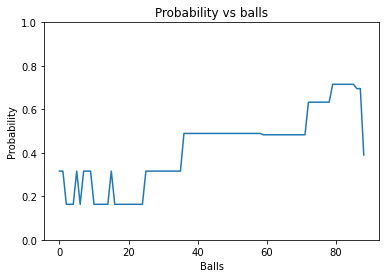

518 980908 1


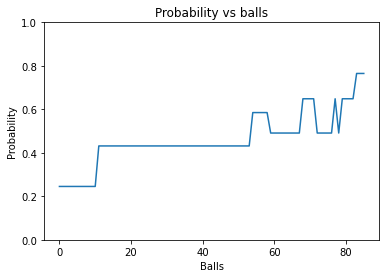

519 980910 1


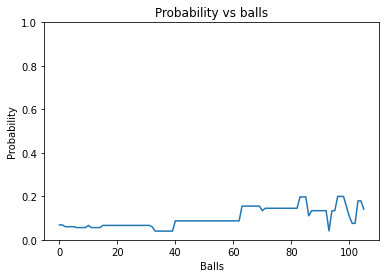

521 980914 1


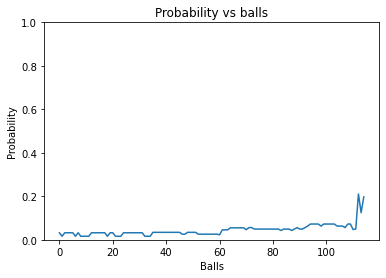

522 980916 1


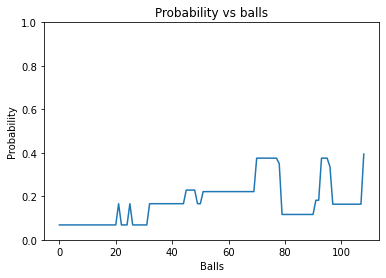

523 980918 1


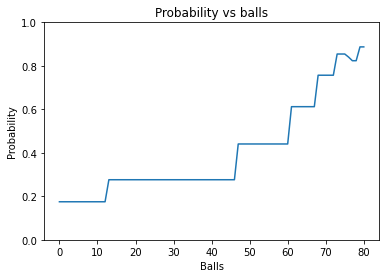

524 980920 1


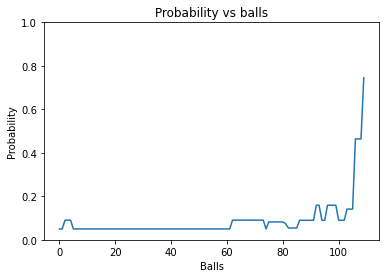

525 980922 1


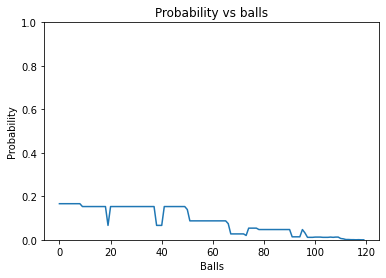

526 980924 1


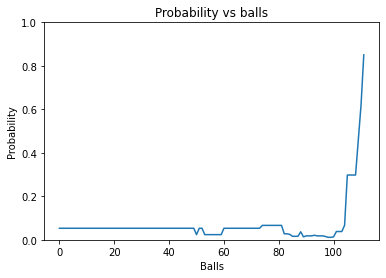

527 980926 1


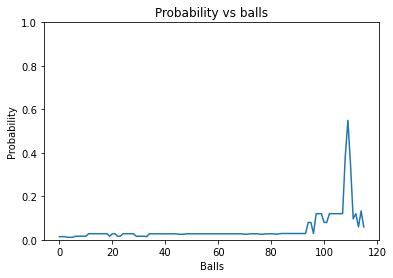

528 980928 1


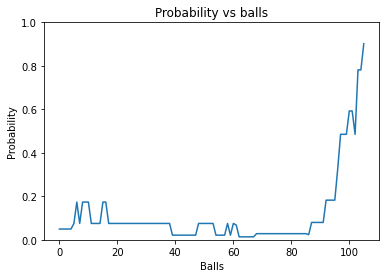

529 980930 1


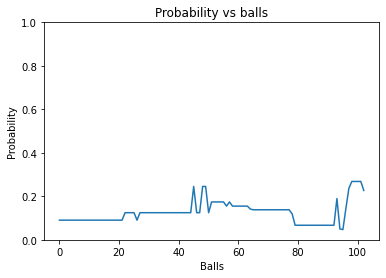

530 980932 1


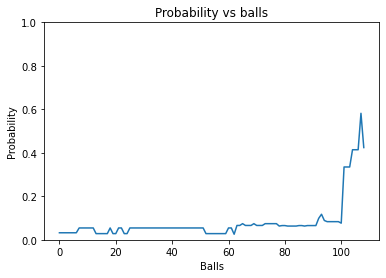

531 980934 1


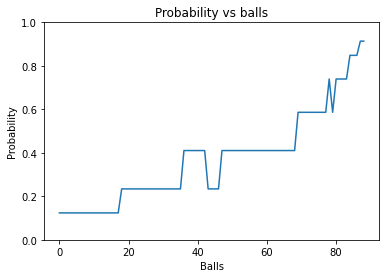

534 980940 1


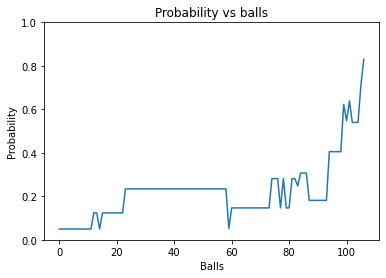

535 980942 1


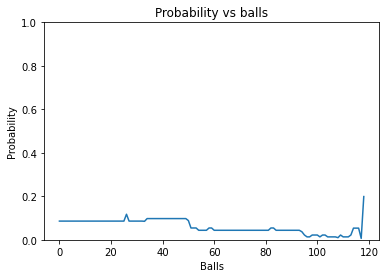

536 980944 1


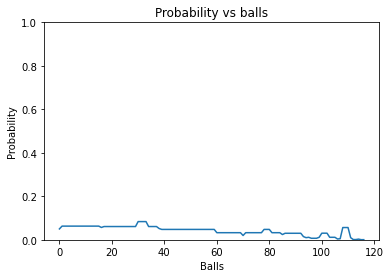

538 980948 1


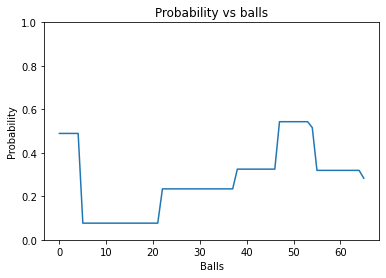

540 980952 1


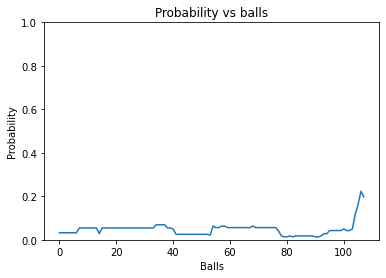

541 980954 1


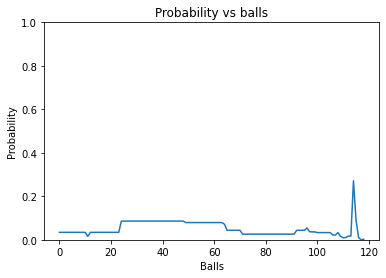

545 980962 1


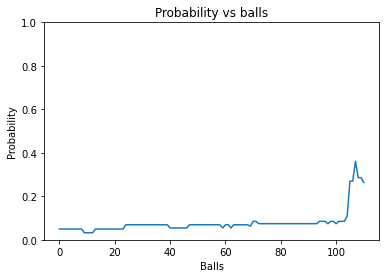

546 980964 1


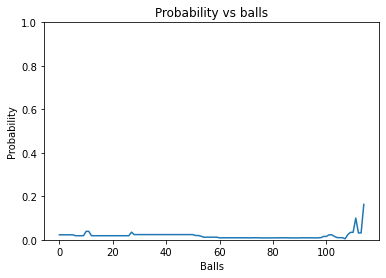

547 980966 1


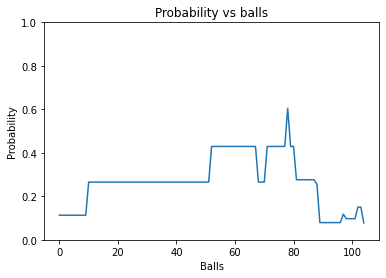

549 980970 1


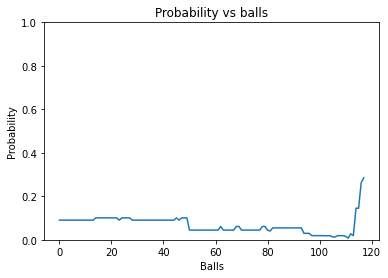

550 980972 1


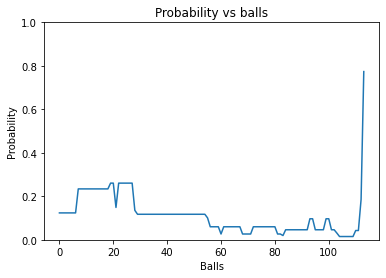

551 980974 1


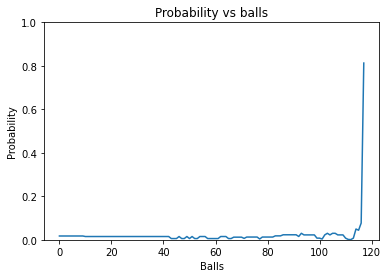

554 980980 1


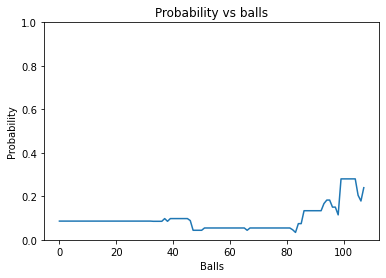

557 980986 1


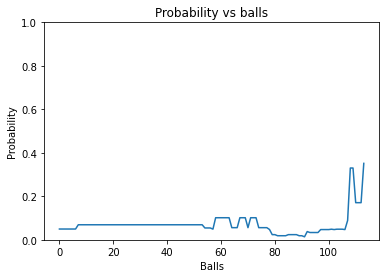

558 980988 1


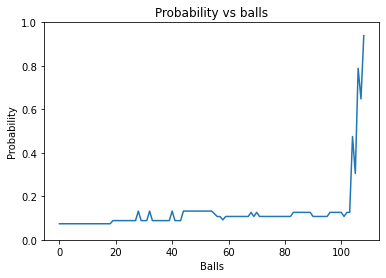

559 980990 1


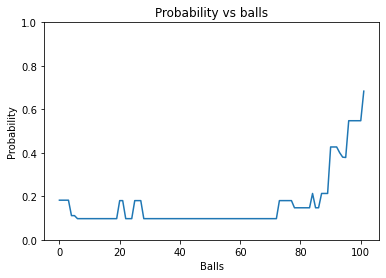

561 980994 1


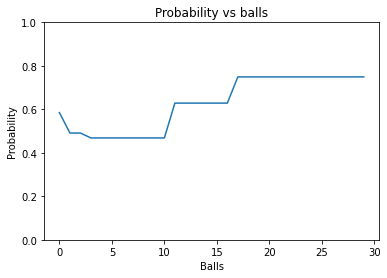

562 980996 1


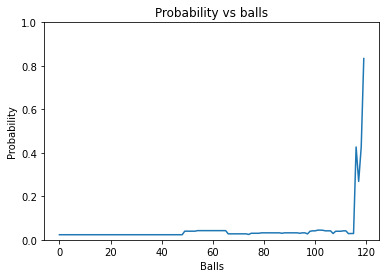

564 981000 1


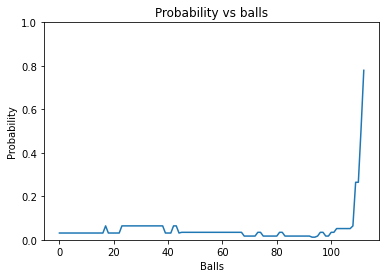

565 981002 1


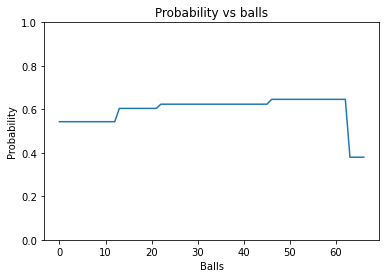

567 981006 1


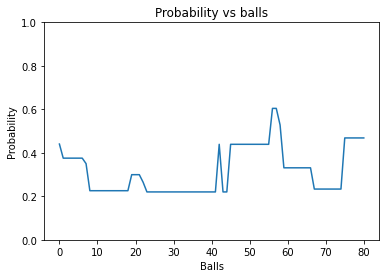

568 981008 1


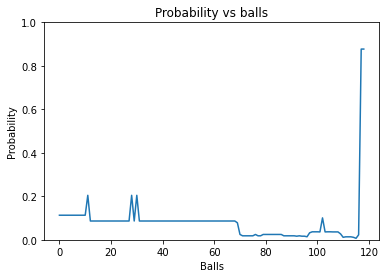

569 981010 1


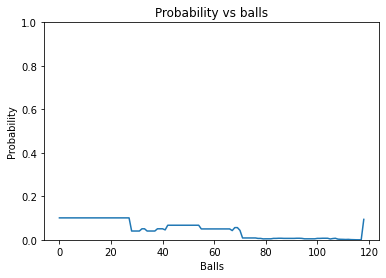

570 981012 1


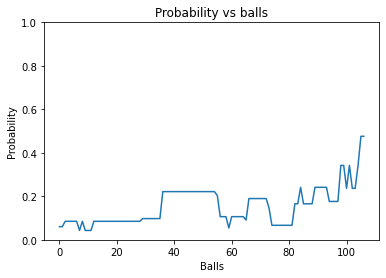

572 981016 1


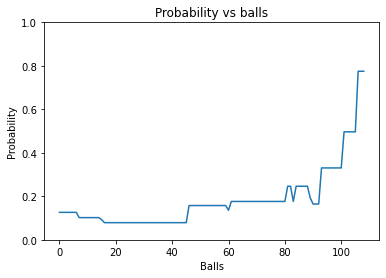

573 981018 1


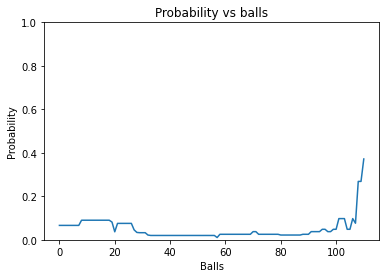

575 981022 1


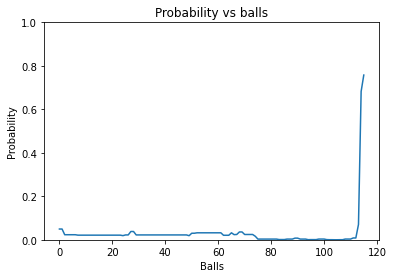

In [65]:
## Navie Bayes

test_df.head()
for j in test_df.index[:]:
    if win_dict.get(test_df.loc[j,'Match_Id'],-1)!=1:
        continue
#     if test_df.loc[j,'Match_Id'] != 980926:
#         continue
    print(j,test_df.loc[j,'Match_Id'],win_dict.get(test_df.loc[j,'Match_Id'],-1))
    test_prun_df = new_prun_df[new_prun_df['Match_Id_y']==test_df.loc[j,'Match_Id']]
    mrunsDict = {}
    nw = 0
    count = -1
    probs = []
    for i in test_prun_df.index:
        count += 1
        currP = test_prun_df.loc[i,'Striker']
        currPn = test_prun_df.loc[i,'Non_Striker']
        if test_prun_df.loc[i,'Innings_No_y']==2:
            currM = test_prun_df.loc[i,'Match_Id_y']
            currO = test_prun_df.loc[i,'Over_Id_y']
            currB = test_prun_df.loc[i,'Ball_Id_y']
#             if currB==0 or currB==2 or currB==4:
#                 continue
            if mrunsDict.get(currM,-1)==-1:
                mrunsDict[currM] = 0
            mrunsDict[currM] += new_prun_df.loc[i,'Runs_Scored']
            reqruns = (matchruns[currM][1]-mrunsDict[currM])
            remBalls = (20-currO)*6+(6-currB)
            if remBalls == 0:
                continue
            reqRunRate = 1+(reqruns*6)//remBalls
            if math.isnan(reqRunRate) or reqRunRate<=0:
                reqRunRate = 1
            else:
                reqRunRate = int(reqRunRate)
                
            #######################
            wr = 0
            lr = 0
            for k in range(0,10):
                if playerDict[currP].get(reqRunRate-k,None)!=None:
                    lr += (0.5**(k+1))*(playerDict[currP].get(reqRunRate-k,[0,0])[0]/sum(playerDict[currP].get(reqRunRate-k,[0,0])))
                if playerDict[currP].get(reqRunRate+k,None)!=None:
                    lr += (0.5**(k+1))*(playerDict[currP].get(reqRunRate+k,[0,0])[0]/sum(playerDict[currP].get(reqRunRate+k,[0,0])))
                if playerDict[currP].get(reqRunRate-k,None)!=None:
                    wr += (0.5**(k+1))*(playerDict[currP].get(reqRunRate-k,[0,0])[1]/sum(playerDict[currP].get(reqRunRate-k,[0,0])))
                if playerDict[currP].get(reqRunRate+k,None)!=None:
                    wr += (0.5**(k+1))*(playerDict[currP].get(reqRunRate+k,[0,0])[1]/sum(playerDict[currP].get(reqRunRate+k,[0,0])))
            if wr == 0:
                wr = 0.0001
            if lr == 0:
                lr = 0.0001
            ###########################
            wr1 = 0
            lr1 = 0
            for k in range(0,10):
                if playerDict[currPn].get(reqRunRate-k,None)!=None:
                    lr1 += (0.5**(k+1))*(playerDict[currPn].get(reqRunRate-k,[0,0])[0]/sum(playerDict[currPn].get(reqRunRate-k,[0,0])))
                if playerDict[currPn].get(reqRunRate+k,None)!=None:
                    lr1 += (0.5**(k+1))*(playerDict[currPn].get(reqRunRate+k,[0,0])[0]/sum(playerDict[currPn].get(reqRunRate+k,[0,0])))
                if playerDict[currPn].get(reqRunRate-k,None)!=None:
                    wr1 += (0.5**(k+1))*(playerDict[currPn].get(reqRunRate-k,[0,0])[1]/sum(playerDict[currPn].get(reqRunRate-k,[0,0])))
                if playerDict[currPn].get(reqRunRate+k,None)!=None:
                    wr1 += (0.5**(k+1))*(playerDict[currPn].get(reqRunRate+k,[0,0])[1]/sum(playerDict[currPn].get(reqRunRate+k,[0,0])))
            if wr1 == 0:
                wr1 = 0.0001
            if lr1 == 0:
                lr1 = 0.0001
            wr += wr1
            lr += lr1
            ###############################
#             owr = 0
#             olr = 0
#             for k in range(0,3):
#                 if runrate_dict.get(reqRunRate-k,None)!=None:
#                     olr += (0.5**(k+1))*(runrate_dict.get(reqRunRate-k,[0,0])[0]/sum(runrate_dict.get(reqRunRate-k,[0,0])))
#                 if runrate_dict.get(reqRunRate+k,None)!=None:
#                     olr += (0.5**(k+1))*(runrate_dict.get(reqRunRate+k,[0,0])[0]/sum(runrate_dict.get(reqRunRate+k,[0,0])))
#                 if runrate_dict.get(reqRunRate-k,None)!=None:
#                     owr += (0.5**(k+1))*(runrate_dict.get(reqRunRate-k,[0,0])[1]/sum(runrate_dict.get(reqRunRate-k,[0,0])))
#                 if runrate_dict.get(reqRunRate+k,None)!=None:
#                     owr += (0.5**(k+1))*(runrate_dict.get(reqRunRate+k,[0,0])[1]/sum(runrate_dict.get(reqRunRate+k,[0,0])))
#             if owr == 0:
#                 owr = 0.0001
#             if olr == 0:
#                 olr = 0.0001
                
            ############################
            wwr = 0
            lwr = 0
            wick =  out_df[(out_df['Match_Id']==int(currM)) & (out_df['Innings_No']==2) & (out_df['Over_Id']==int(currO)) & (out_df['Ball_Id']==int(currB))]
            if wick.shape[0]>0:
                nw += 1
            lwr,wwr = out_dict[nw]
            if count==0 and ((owr*wr*wwr)/(owr*wr*wwr+olr*lr*lwr)) >0.7:
                print("break : ",test_df.loc[j,'Match_Id'],(owr*wr*wwr)/(owr*wr*wwr+olr*lr*lwr))
                break
            probs.append((owr*wr*wwr)/(owr*wr*wwr+olr*lr*lwr))
#             print('Over No. : ',currO,'| Ball No. : ',currB,'| ReqRunRate : ',reqRunRate,'| Probability : ',(owr*wr*wwr)/(owr*wr*wwr+olr*lr*lwr),'|',wr,lr,wwr,lwr,owr,lwr)
    plt.plot(probs)
    plt.ylim(0, 1)
    plt.xlabel("Balls")
    plt.ylabel("Probability")
    plt.title("Probability vs balls")
    plt.show()

[0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.02332587465925178, 0.0233258746

Text(0.5, 1.0, 'Probability vs balls')

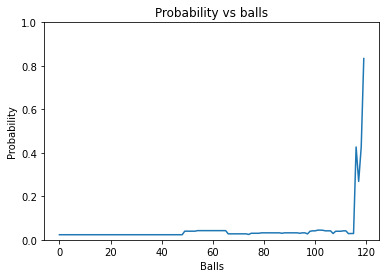

In [63]:
import matplotlib.pyplot as plt

print(probs)
plt.plot(probs)
plt.ylim(0, 1)
plt.xlabel("Balls")
plt.ylabel("Probability")
plt.title("Probability vs balls")